https://learnopencv.com/ultralytics-yolov8/
https://www.youtube.com/watch?v=8Q87QYlonRU
https://www.youtube.com/watch?v=em_lOAp8DJE

In [26]:
import zipfile
import os

In [40]:
%cd car_detection

/content/drive/MyDrive/car_detection


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
%cd drive/MyDrive/car_detection

/content/drive/MyDrive/car_detection


validation 

In [46]:
folder_path='/content/drive/MyDrive/aialone_car/train'
file_list=os.listdir(folder_path)
file_count=len(file_list)
print(file_count)

12948


In [47]:
import shutil
src='/content/drive/MyDrive/aialone_car/train/'
dest='/content/drive/MyDrive/aialone_car/val/'
for i in range(2588):
  shutil.move(src+file_list[i],dest)


yaml 파일 만들기

In [41]:
%pip install PyYAML

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [48]:
import yaml
data={'train':'/content/drive/MyDrive/aialone_car/train',
      'val':'/content/drive/MyDrive/aialone_car/val',
      'test':'/content/drive/MyDrive/aialone_car/test',
      'names':['chevrolet_malibu_sedan_2012_2016',
'chevrolet_malibu_sedan_2017_2019',
'chevrolet_spark_hatchback_2016_2021',
'chevrolet_trailblazer_suv_2021_',
'chevrolet_trax_suv_2017_2019',
'genesis_g80_sedan_2016_2020',
'genesis_g80_sedan_2021_',
'genesis_gv80_suv_2020_',
'hyundai_avante_sedan_2011_2015',
'hyundai_avante_sedan_2020_',
'hyundai_grandeur_sedan_2011_2016',
'hyundai_grandstarex_van_2018_2020',
'hyundai_ioniq_hatchback_2016_2019',
'hyundai_sonata_sedan_2004_2009',
'hyundai_sonata_sedan_2010_2014',
'hyundai_sonata_sedan_2019_2020',
'kia_carnival_van_2015_2020',
'kia_carnival_van_2021_',
'kia_k5_sedan_2010_2015',
'kia_k5_sedan_2020_',
'kia_k7_sedan_2016_2020',
'kia_mohave_suv_2020_',
'kia_morning_hatchback_2004_2010',
'kia_morning_hatchback_2011_2016',
'kia_ray_hatchback_2012_2017',
'kia_sorrento_suv_2015_2019',
'kia_sorrento_suv_2020_',
'kia_soul_suv_2014_2018',
'kia_sportage_suv_2016_2020',
'kia_stonic_suv_2017_2019',
'renault_sm3_sedan_2015_2018',
'renault_xm3_suv_2020_',
'ssangyong_korando_suv_2019_2020',
'ssangyong_tivoli_suv_2016_2020'],

'nc':34
}

with open('/content/drive/MyDrive/car_detection/car.yaml','w') as f:
  yaml.dump(data,f)

with open('/content/drive/MyDrive/car_detection/car.yaml','r') as f:
  car_yaml=yaml.safe_load(f)
  display(car_yaml)

{'names': ['chevrolet_malibu_sedan_2012_2016',
  'chevrolet_malibu_sedan_2017_2019',
  'chevrolet_spark_hatchback_2016_2021',
  'chevrolet_trailblazer_suv_2021_',
  'chevrolet_trax_suv_2017_2019',
  'genesis_g80_sedan_2016_2020',
  'genesis_g80_sedan_2021_',
  'genesis_gv80_suv_2020_',
  'hyundai_avante_sedan_2011_2015',
  'hyundai_avante_sedan_2020_',
  'hyundai_grandeur_sedan_2011_2016',
  'hyundai_grandstarex_van_2018_2020',
  'hyundai_ioniq_hatchback_2016_2019',
  'hyundai_sonata_sedan_2004_2009',
  'hyundai_sonata_sedan_2010_2014',
  'hyundai_sonata_sedan_2019_2020',
  'kia_carnival_van_2015_2020',
  'kia_carnival_van_2021_',
  'kia_k5_sedan_2010_2015',
  'kia_k5_sedan_2020_',
  'kia_k7_sedan_2016_2020',
  'kia_mohave_suv_2020_',
  'kia_morning_hatchback_2004_2010',
  'kia_morning_hatchback_2011_2016',
  'kia_ray_hatchback_2012_2017',
  'kia_sorrento_suv_2015_2019',
  'kia_sorrento_suv_2020_',
  'kia_soul_suv_2014_2018',
  'kia_sportage_suv_2016_2020',
  'kia_stonic_suv_2017_2019'

ultralytics, yolo 설치

In [10]:
!git clone https://github.com/ultralytics/ultralytics.git

Cloning into 'ultralytics'...
remote: Enumerating objects: 9904, done.
remote: Counting objects: 100% (2025/2025), done.
remote: Compressing objects: 100% (1007/1007), done.
remote: Total 9904 (delta 1346), reused 1574 (delta 1014), pack-reused 7879
Receiving objects: 100% (9904/9904), 6.30 MiB | 10.24 MiB/s, done.
Resolving deltas: 100% (6658/6658), done.
Updating files: 100% (367/367), done.


In [11]:
%cd ultralytics

/content/drive/MyDrive/car_detection/ultralytics


In [ ]:
%pip install -r requirements.txt

In [ ]:
%pip install ultralytics

In [14]:
from ultralytics import YOLO

In [15]:
model = YOLO('yolov8m.pt')

100%|██████████| 49.7M/49.7M [00:00<00:00, 104MB/s]


욜로 잘 설치됐는지 테스트

In [22]:
results=model.predict('test.png')


image 1/1 /content/drive/MyDrive/car_detection/ultralytics/test.png: 352x640 3 cars, 1374.4ms
Speed: 15.4ms preprocess, 1374.4ms inference, 27.2ms postprocess per image at shape (1, 3, 640, 640)


In [23]:
result=results[0]
print(len(result.boxes))

3


In [24]:
for box in result.boxes:
    label=result.names[box.cls[0].item()]
    cords=[round(x) for x in box.xyxy[0].tolist()]
    prob=box.conf[0].item()
    print('type:', label)
    print('Coordinates:', cords)
    print('Probability:',prob)

type: car
Coordinates: [802, 420, 1132, 779]
Probability: 0.9395014047622681
type: car
Coordinates: [328, 243, 589, 514]
Probability: 0.9333546757698059
type: car
Coordinates: [1036, 204, 1315, 447]
Probability: 0.910247802734375


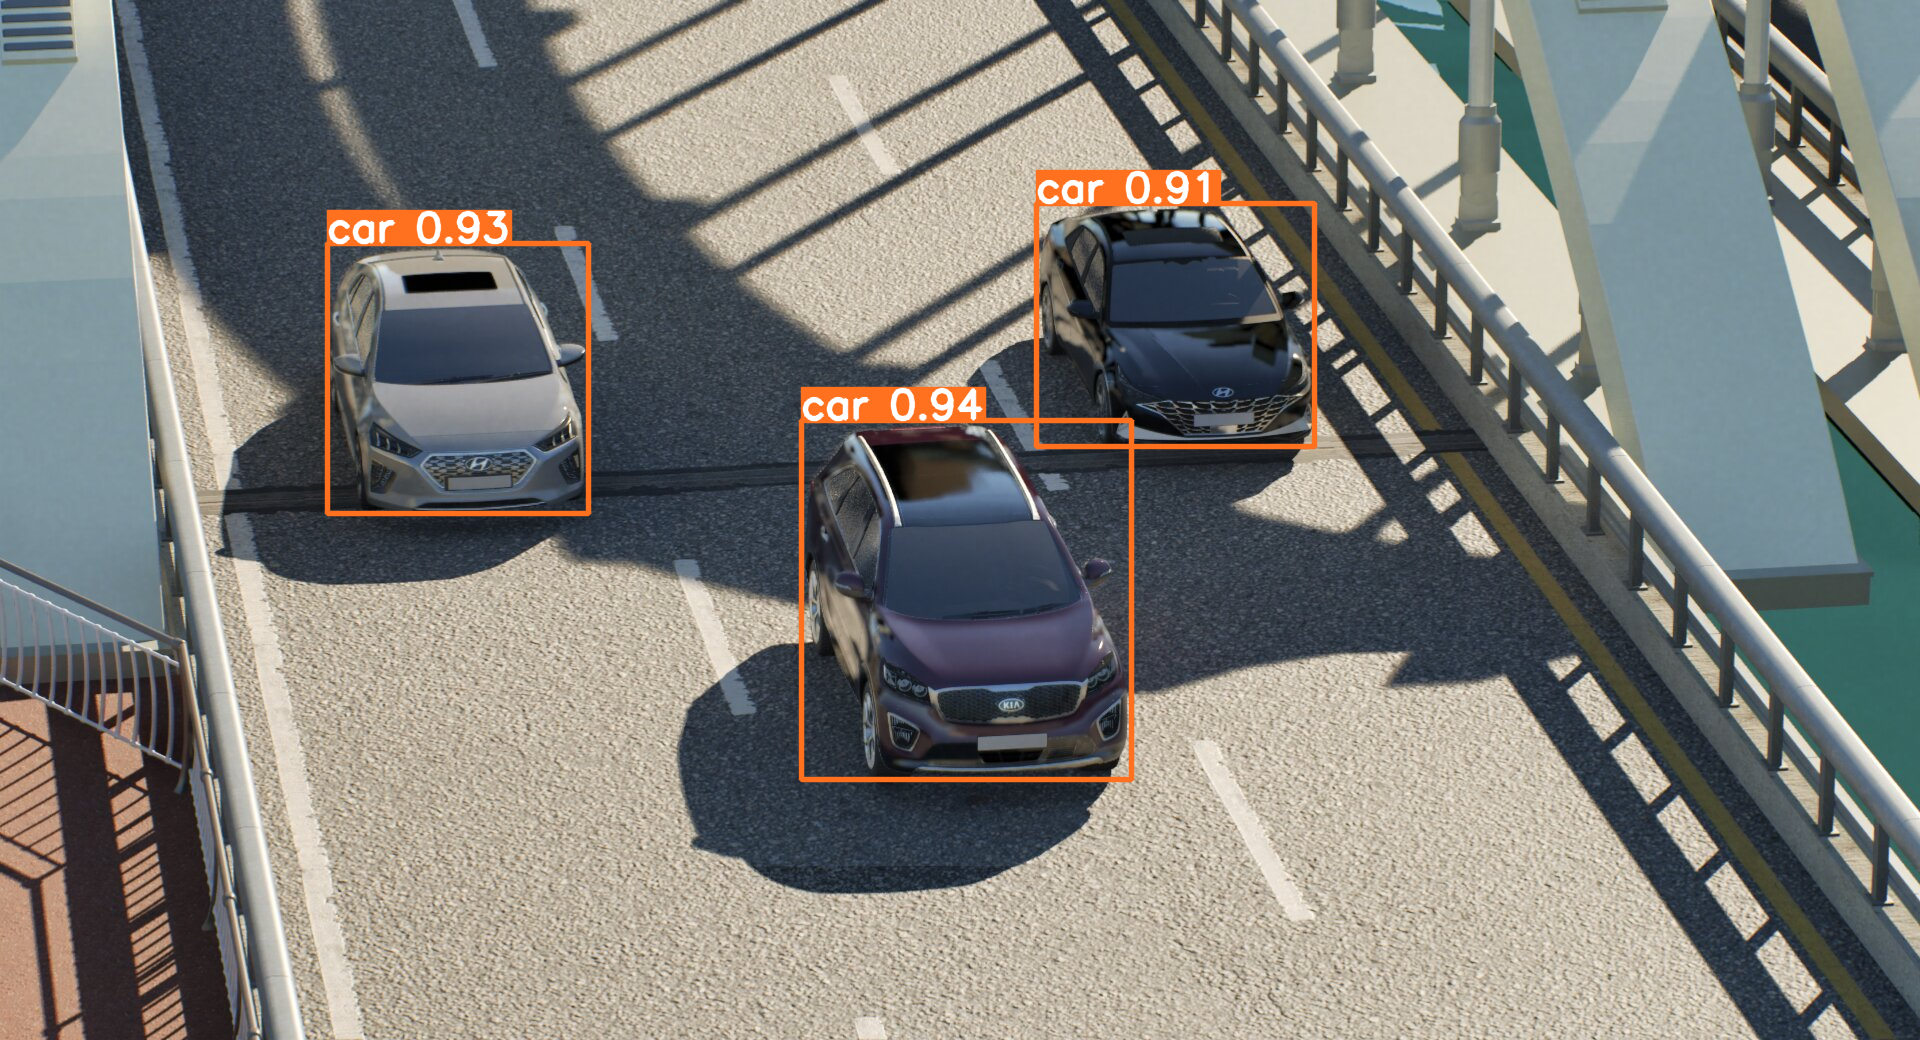

In [25]:
from PIL import Image
Image.fromarray(result.plot()[:,:,::-1])

커스텀 데이터 학습시키기

In [ ]:
model.train(data='/content/drive/MyDrive/car_detection/car.yaml', epochs=10, patience=30,batch=32,imgsz=416)

Ultralytics YOLOv8.0.109 🚀 Python-3.10.11 torch-2.0.1+cu118 CPU
yolo/engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/drive/MyDrive/car_detection/car.yaml, epochs=10, patience=30, batch=32, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=Fals